# Communities

In [1]:
%pylab inline
import powerlaw
print(powerlaw.__version__)

import pylab
pylab.rcParams['xtick.major.pad']='8'
pylab.rcParams['ytick.major.pad']='8'
#pylab.rcParams['font.sans-serif']='Arial'

from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=10.0)
rc('text', usetex=False)

from matplotlib.font_manager import FontProperties
panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(12.0)
panel_label_font.set_family("sans-serif")

Populating the interactive namespace from numpy and matplotlib
1.4.4


0.2659452243010437


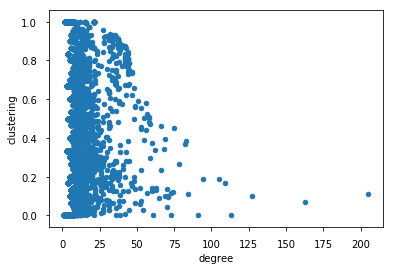

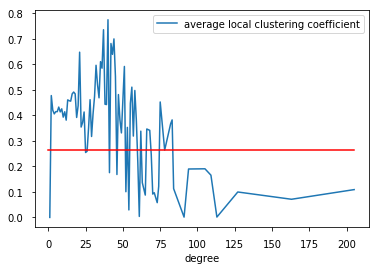

In [49]:
import networkx as nx
from collections import Counter
from scipy import stats
import pandas as pd
import matplotlib.lines as mlines

A = np.loadtxt('Data/arenas-pgp/out.arenas-pgp', dtype=int, usecols=range(2), comments="%")
G=nx.Graph()
for n in A:
    G.add_edge(n[0], n[1])

avg_clustering = nx.average_clustering(G)
print(avg_clustering)
clustering = nx.clustering(G)
degCoeff = [] #node, degree, clustering coefficient
for deg in G.degree():
    coeff = clustering[deg[0]]
    deg = deg + (coeff,)
    degCoeff.append(deg)

degrees = [degree for node, degree, c in degCoeff]  
coefficients = [c for node, degree, c in degCoeff]  

df = pd.DataFrame({'degree': degrees, 'clustering': coefficients})
grouped = df.groupby('degree')['clustering'].mean().reset_index()
grouped.columns = ['degree', 'average local clustering coefficient']
ax0 = df.plot.scatter(x='degree', y='clustering')
ax1 = grouped.plot(x='degree', y='average local clustering coefficient')
l = mlines.Line2D([0,205], [avg_clustering,avg_clustering], color='red', label='average clustering coefficient')
ax1.add_line(l)

In [3]:
import community
import networkx as nx
import matplotlib.pyplot as plt

# Compute the partition of the graph nodes which maximises the modularity (or try..) 
# using the Louvain heuristices
# This is the partition of highest modularity, i.e. the highest partition of the dendrogram 
# generated by the Louvain algorithm.
partition = community.best_partition(G)
print(partition)
modularity = community.modularity(partition, G)
print("modularity: "+ str(modularity))

{1: 0, 2: 0, 617: 0, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 26: 1, 1251: 1, 1266: 1, 1272: 1, 1299: 1, 1300: 1, 1301: 1, 1313: 1, 1408: 1, 1470: 1, 1530: 1, 1533: 1, 1537: 1, 1540: 1, 1548: 1, 1613: 1, 1933: 1, 1934: 1, 1935: 1, 1936: 1, 1937: 1, 1938: 1, 1939: 1, 1940: 1, 1941: 1, 1942: 1, 1943: 1, 1944: 1, 1945: 1, 1947: 1, 1948: 1, 1950: 1, 1951: 1, 1952: 1, 1953: 1, 1954: 1, 1955: 1, 1956: 1, 1957: 1, 1958: 1, 2582: 1, 2838: 1, 4041: 1, 4045: 1, 5737: 1, 8335: 1, 5828: 2, 1274: 1, 1293: 1, 1294: 1, 1295: 1, 1785: 1, 2713: 1, 2716: 1, 2719: 1, 2720: 1, 6236: 1, 6237: 1, 6239: 1, 1269: 1, 9145: 1, 9852: 3, 9945: 1, 8: 4, 9: 4, 10: 4, 4613: 4, 1744: 4, 11: 5, 12: 5, 13: 5, 338: 1, 1283: 1, 7352: 5, 7353: 5, 7558: 5, 7559: 5, 7560: 5, 7561: 5, 7562: 5, 14: 6, 15: 6, 16: 6, 17: 6, 18: 6, 8709: 6, 773: 6, 8337: 6, 8710: 6, 9318: 6, 6796: 6, 19: 6, 20: 6, 697: 6, 21: 7, 22: 7, 9879: 7, 23: 8, 24: 8, 25: 8, 27: 8, 28: 8, 29: 8, 30: 8, 31: 8, 32: 8, 33: 8, 34: 8, 35: 8, 36: 8, 37: 8, 38: 8, 39: 8, 4

In [ ]:
communities = {}
for key, value in sorted(partition.items()):
    communities.setdefault(value, []).append(key)

for m, nodes in communities.items():
    H = G.subgraph(nodes)
    s = list([100+degree ** 2.2 for node, degree in G.degree(nodes)])
    degrees = {}
    for node, degree in G.degree(nodes):
        degrees[node] = degree
    plt.gcf().clear()
    #nx.draw(H,pos=nx.spring_layout(H), node_color=list(degrees.values()), node_size=s, cmap=plt.cm.tab20)
    pos=nx.spring_layout(H, scale=5.0, iterations=500)

    cm = plt.cm.coolwarm
    ec = nx.draw_networkx_edges(H, pos, alpha=0.2)
    nc = nx.draw_networkx_nodes(H, pos, nodelist=H.nodes(), node_color=list(degrees.values()), 
                            with_labels=False, node_size=s, cmap=cm)
    
    plt.colorbar(nc)

    plt.axis('off')
    plt.savefig("output/"+str(m)+'.png', bbox_inches='tight')

Betweenness centrality is a node importance metric that uses information about the shortest paths in a network. It is defined as the fraction of all possible shortest paths between any pair of nodes that pass through the node.
The degree of a node is the number of neighbors that it has. The degree centrality is the number of neighbors divided by all possible neighbors that it could have. Depending on whether self-loops are allowed, the set of possible neighbors a node could have could also include the node itself.

{1: 0.0, 2: 0.00018728345350688268, 617: 0.0003745318286370081, 3: 4.4691989233803784e-07, 4: 0.0025030160775888657, 5: 0.00032079301421768583, 6: 5.541690387249671e-05, 7: 0.0018985129915074473, 26: 0.028611349276881137, 1251: 0.13118948721526424, 1266: 0.0017971692203490193, 1272: 0.015154156082250823, 1299: 0.000438598872274005, 1300: 0.00015761445261027493, 1301: 0.00019070589413798574, 1313: 0.004763689721012816, 1408: 0.0015651781262324286, 1470: 0.008207817439285248, 1530: 0.002490321036527239, 1533: 0.0034177690583524225, 1537: 0.0009007868911715426, 1540: 0.0033192230675755836, 1548: 0.006663021909156626, 1613: 0.0006548490710571763, 1933: 0.004722996089557192, 1934: 3.545709459920249e-05, 1935: 0.0014509134922405474, 1936: 4.2565021107649025e-05, 1937: 3.465960150461461e-05, 1938: 0.0001492569260883259, 1939: 6.101991308076711e-05, 1940: 3.501365879196117e-05, 1941: 0.00044684355449763774, 1942: 2.22249895122846e-05, 1943: 0.0036987884848956273, 1944: 1.2644465780827952e-05, 

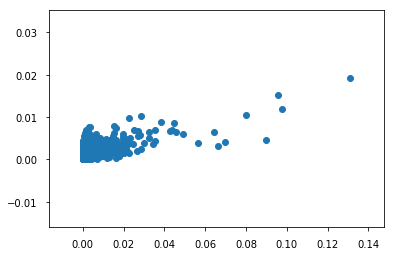

In [51]:
betweenness_centrality = nx.betweenness_centrality(G)
print(betweenness_centrality)

degree_centrality = nx.degree_centrality(G)


0.13118948721526424
0.13118948721526424


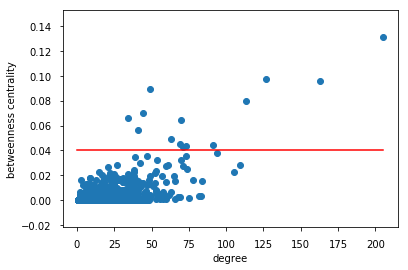

In [76]:
centralities = {} #node, degree, clustering coefficient
for deg in G.degree():
    bet_cen = betweenness_centrality[deg[0]]
    centralities[deg[0]] = (deg[1], bet_cen)
    
degs = [deg for deg, cen in centralities.values()]
cents = [cen for deg, cen in centralities.values()]
print(np.max(cents))
   
fig, ax = plt.subplots()
plt.xlabel('degree')
plt.ylabel('betweenness centrality')
ax.scatter(degs, cents)
l = mlines.Line2D([0,205], [0.04,0.04], color='red')

#transform = ax.transAxes
#l.set_transform(transform)
ax.add_line(l)
